# Coding Session #3 : Different types of ML and Data, Feature Engineering

After completing our first three lessons, we have gained the foundational knowledge necessary to take the first steps in developing a machine learning project. We are now able to understand and manipulate data, perform essential preprocessing tasks, and apply basic techniques to prepare datasets for model training.

Throughout this learning journey, we have also deepened our understanding of the different types of machine learning, particularly supervised and unsupervised learning. We now recognize their distinct purposes and how they can be applied to different problems. Our objective here will aslo be to combine these two approaches in a real-world business use case to explore their complementarity. By doing so, we will gain insights into how leveraging both techniques together can lead to more powerful and insightful solutions.

# **Objective : Churn prediction**
Your task is to analyze customer data and build predictive models to identify customers at risk of churning. You will explore both unsupervised and supervised learning techniques to gain insights and optimize predictions.

# **Instructions**
**Data Import & Initial Analysis**

- Download the customers_raw.csv file from Blackboard.
  
  The dataset provides information about customers, their use of telecommunication services (minutes, calls, charges), and their engagement (account duration, customer service interactions, subscribed plans).
- Load the dataset and explore its structure.
- Generate key metrics (KPIs) and visualizations to understand the data distribution, trends, and patterns.

**Data Cleaning & Preparation**

- Identify and handle missing values, outliers, and any - inconsistencies in the dataset.
- Rename columns if necessary for clarity and consistency.
- Perform any other preprocessing steps that could improve data quality and model performance.

**Unsupervised Learning: Customer Clustering**

- Implement a clustering algorithm (e.g., K-Means or another suitable model) to segment customers based on relevant features.
- Analyze the clusters to identify patterns and insights that could help with churn prediction.

**Supervised Learning: Churn Prediction**

- Train a binary classification model to predict whether a customer is likely to churn.
- Experiment with different algorithms and evaluate their effectiveness.

**Feature Engineering & Hyperparameter Tuning**

- Extract and engineer relevant features before training your model(s) (encoding ?)
- Fine-tune the hyperparameters of both your clustering and classification models.

# **Guidelines**
- Focus on feature engineering and hyperparameter tuning to enhance your models.
- Do not aim to maximize a specific metric yet—this will be covered later in the course.
- Clearly document your approach, justifying the choices you make for preprocessing, feature selection, and model tuning.
- Use appropriate visualizations to support your analysis.
- All of the steps above aren't exhaustive, please feel free to explore and test any kind of relevant feature for this use-case.




**This project is an opportunity to apply various machine learning techniques and develop a structured approach to predictive modeling. Take the time to explore your data and iterate on your models for better insights and performance.**

# I. Data Import & Initial Analysis

#### We start by importing the csv with Pandas 

In [911]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


In [912]:
df=pd.read_csv('customers_raw.csv')
pd.set_option('display.max_columns', None)

In [913]:
df.shape

(5142, 21)

In [914]:
df.head(2)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   

   Intl Charge  CustServ Calls  Churn?  
0          2.7               1  False.  
1          3.7               1  False.

#### Check for incorrectly formatted data

In [915]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

#### Rename columns for greater clarity

In [916]:
df.columns=['State', 'duration', 'Area Code', 'Phone', 'Inter_plan',
       'Vocal Plan', 'Vocal Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Inter_Mins', 'Inter_Calls', 'Inter_Charge',
       'CustServ Calls', 'Churn']

In [917]:
df.head(5)

State  duration  Area Code     Phone Inter_plan Vocal Plan  Vocal Message  \
0    KS       128        415  382-4657         no        yes             25   
1    OH       107        415  371-7191         no        yes             26   
2    NJ       137        415  358-1921         no         no              0   
3    OH        84        408  375-9999        yes         no              0   
4    OK        75        415  330-6626        yes         no              0   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   Night Mins  Night Calls  Night Charge  Inter_Mins  Inter_Calls  \
0       244.7           91         11.01        10.0            3   
1       254.4          103         11.45        13.7            3   
2       162.6          104          7.32        12.2            5   
3       196.9           89          8.86         6.6            7   
4       186.9          121          8.41        10.1            3   

   Inter_Charge  CustServ Calls   Churn  
0          2.70               1  False.  
1          3.70               1  False.  
2          3.29               0  False.  
3          1.78               2  False.  
4          2.73               3  False.

#### We observe the class distribution in our target 

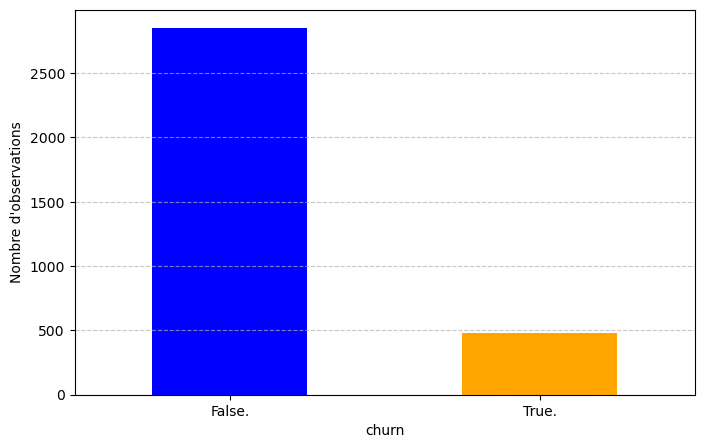

In [918]:
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])

plt.xlabel('churn')
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### We observe now some distribution and breakdown of our data, identifying the different classes of our target in each observation 

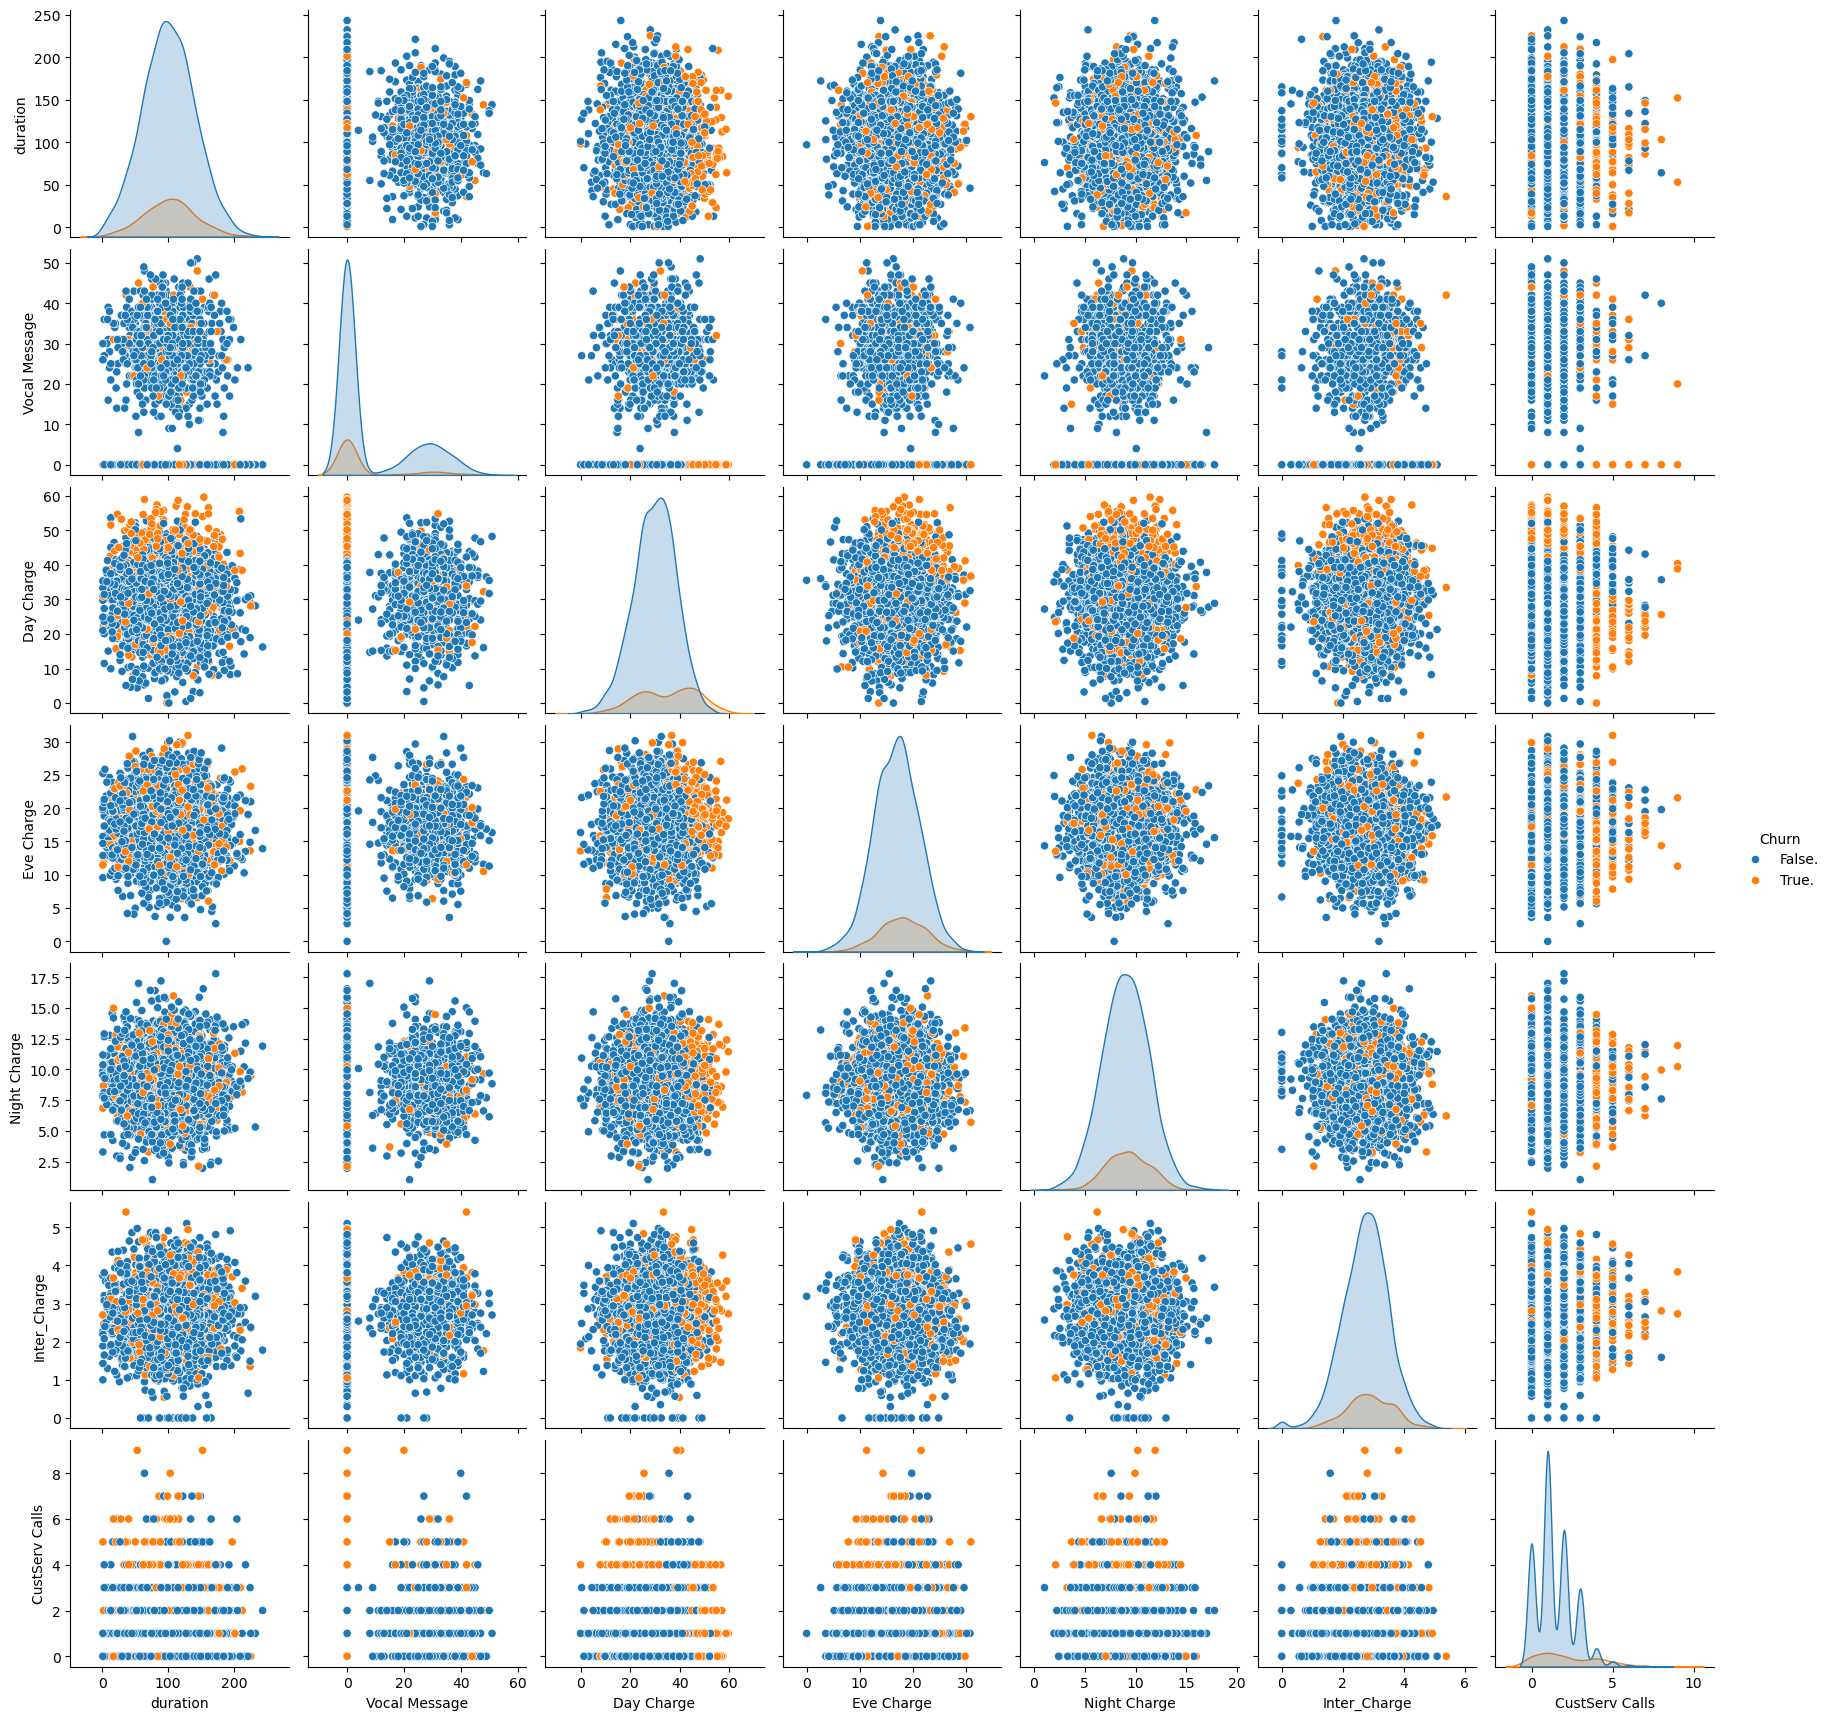

In [919]:
selected_features_explorations=['duration', 'Vocal Message', 'Day Charge',
       'Eve Charge','Night Charge', 'Inter_Charge',
       'CustServ Calls', 'Churn']

sns.pairplot(df[selected_features_explorations], hue="Churn", diag_kind="kde")
plt.show()

## Usefull KPIs for churn : 

- Average Revenu Per User : based on total charge by client, we decide if the client spend more than the average
- Life time Value 
- Customer Services ratio : we compare the nb of call at the CustServ with the reste of the call 
- Proportion of Customer Services call : we compare the nb au call at the CustServ along the duration

In [920]:
df['ARPU']=df['Day Charge']+ df['Night Charge'] + df['Eve Charge'] + df['Inter_Charge'] 
df['High-Value Customer']=df['ARPU'].apply(lambda x : 1 if (x > df['ARPU'].mean()) else x*0 )
df['LTV']=df['ARPU']/df['duration']
df['CustServ rate']=df['CustServ Calls']/(df['Day Calls'] + df['Eve Calls'] + df['Inter_Calls'])
df['prop CustServ']=df['CustServ Calls']/df['duration']

In [921]:
df.head(2)


State  duration  Area Code     Phone Inter_plan Vocal Plan  Vocal Message  \
0    KS       128        415  382-4657         no        yes             25   
1    OH       107        415  371-7191         no        yes             26   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   

   Night Mins  Night Calls  Night Charge  Inter_Mins  Inter_Calls  \
0       244.7           91         11.01        10.0            3   
1       254.4          103         11.45        13.7            3   

   Inter_Charge  CustServ Calls   Churn   ARPU  High-Value Customer       LTV  \
0           2.7               1  False.  75.56                  1.0  0.590313   
1           3.7               1  False.  59.24                  0.0  0.553645   

   CustServ rate  prop CustServ  
0       0.004717       0.007812  
1       0.004367       0.009346

# II. Data Cleaning & Preparation

### We start by cleaning up the target as it is currently unusable, encoding yes/true as 1 and no/False as 0. 

In [922]:
df['Churn']=df['Churn'].apply(lambda x : 1 if x=='True.' else 0)

### We do the same with subscriptions

In [923]:
df['Inter_plan']=df['Inter_plan'].apply(lambda x : 1 if x=='yes' else 0)
df['Vocal Plan']=df['Vocal Plan'].apply(lambda x : 1 if x=='yes' else 0)

### Identify undesirable columns: constant, unique key or empty. 

In [924]:
print(df['Phone'].nunique()==df.shape[0])
print(df.shape[0]-df['Phone'].nunique())

False
1809


In [925]:
df[df['Phone']=="371-7191"]

State  duration  Area Code     Phone  Inter_plan  Vocal Plan  \
1       OH       107        415  371-7191           0           1   
3334    OH       107        415  371-7191           0           1   

      Vocal Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
1                26     161.6        123       27.47     195.5        103   
3334             26     161.6        123       27.47     195.5        103   

      Eve Charge  Night Mins  Night Calls  Night Charge  Inter_Mins  \
1          16.62       254.4          103         11.45        13.7   
3334       16.62       254.4          103         11.45        13.7   

      Inter_Calls  Inter_Charge  CustServ Calls  Churn   ARPU  \
1               3           3.7               1      0  59.24   
3334            3           3.7               1      0  59.24   

      High-Value Customer       LTV  CustServ rate  prop CustServ  
1                     0.0  0.553645       0.004367       0.009346  
3334                  0.0  0.553645       0.004367       0.009346

### We note that there are potentially 5204-3333 duplicates in the data set. We have made sure that there is no new information.

In [926]:
df = df.drop_duplicates(subset=['Phone'])
df.shape

(3333, 26)

#### Let's check whether the states and zones are interesting data or not, i.e. whether it's constant or unique. 

In [927]:
print(df['State'].nunique(), df['Area Code'].nunique())

51 3


#### States may have more impact on churn than Area Code, but in the next section we'll test whether areas reveal a pattern in churn.

#### Let's look at the proportion of Nan in our classes

In [928]:
list_nan=[]
for i in df.columns : 
    list_nan.append(df[i].isna().sum())
list_nan

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [929]:
list_nan=np.zeros((len(df.columns),))
for i in range(len(df.columns)) : 
    for j in range(df.shape[0]) :
        if pd.isna(df.iloc[j,i]) : 
            list_nan[i]+=1
        else :
            list_nan[i]+=0

list_nan

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Using 2 different methods, we can see that there are no empty cells in this dataset

## We redefine our KPI's

In [930]:
df['ARPU']=df['Day Charge']+ df['Night Charge'] + df['Eve Charge'] + df['Inter_Charge'] 
df['High-Value Customer']=df['ARPU'].apply(lambda x : 1 if (x > df['ARPU'].mean()) else x*0 )
df['LTV']=df['ARPU']/df['duration']
df['CustServ rate']=df['CustServ Calls']/( df['Day Calls'] + df['Eve Calls'] + df['Inter_Calls'] )
df['prop CustServ']=df['CustServ Calls']/df['duration']

### Treating outliers

In [931]:
df.describe()

duration    Area Code   Inter_plan   Vocal Plan  Vocal Message  \
count  3333.000000  3333.000000  3333.000000  3333.000000    3333.000000   
mean    101.064806   437.182418     0.096910     0.276628       8.099010   
std      39.822106    42.371290     0.295879     0.447398      13.688365   
min       1.000000   408.000000     0.000000     0.000000       0.000000   
25%      74.000000   408.000000     0.000000     0.000000       0.000000   
50%     101.000000   415.000000     0.000000     0.000000       0.000000   
75%     127.000000   510.000000     0.000000     1.000000      20.000000   
max     243.000000   510.000000     1.000000     1.000000      51.000000   

          Day Mins    Day Calls   Day Charge     Eve Mins    Eve Calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    179.775098   100.435644    30.562307   200.980348   100.114311   
std      54.467389    20.069084     9.259435    50.713844    19.922625   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     143.700000    87.000000    24.430000   166.600000    87.000000   
50%     179.400000   101.000000    30.500000   201.400000   100.000000   
75%     216.400000   114.000000    36.790000   235.300000   114.000000   
max     350.800000   165.000000    59.640000   363.700000   170.000000   

        Eve Charge   Night Mins  Night Calls  Night Charge   Inter_Mins  \
count  3333.000000  3333.000000  3333.000000   3333.000000  3333.000000   
mean     17.083540   200.872037   100.107711      9.039325    10.237294   
std       4.310668    50.573847    19.568609      2.275873     2.791840   
min       0.000000    23.200000    33.000000      1.040000     0.000000   
25%      14.160000   167.000000    87.000000      7.520000     8.500000   
50%      17.120000   201.200000   100.000000      9.050000    10.300000   
75%      20.000000   235.300000   113.000000     10.590000    12.100000   
max      30.910000   395.000000   175.000000     17.770000    20.000000   

       Inter_Calls  Inter_Charge  CustServ Calls        Churn         ARPU  \
count  3333.000000   3333.000000     3333.000000  3333.000000  3333.000000   
mean      4.479448      2.764581        1.562856     0.144914    59.449754   
std       2.461214      0.753773        1.315491     0.352067    10.502261   
min       0.000000      0.000000        0.000000     0.000000    22.930000   
25%       3.000000      2.300000        1.000000     0.000000    52.380000   
50%       4.000000      2.780000        1.000000     0.000000    59.470000   
75%       6.000000      3.270000        2.000000     0.000000    66.480000   
max      20.000000      5.400000        9.000000     1.000000    96.150000   

       High-Value Customer          LTV  CustServ rate  prop CustServ  
count          3333.000000  3333.000000    3333.000000    3333.000000  
mean              0.500750     0.930584       0.007791       0.024527  
std               0.500074     2.927339       0.006724       0.105444  
min               0.000000     0.158488       0.000000       0.000000  
25%               0.000000     0.447424       0.004167       0.006667  
50%               1.000000     0.589368       0.005618       0.013423  
75%               1.000000     0.815570       0.011111       0.025974  
max               1.000000    69.950000       0.041475       5.000000

<Figure size 1000x1000 with 0 Axes>

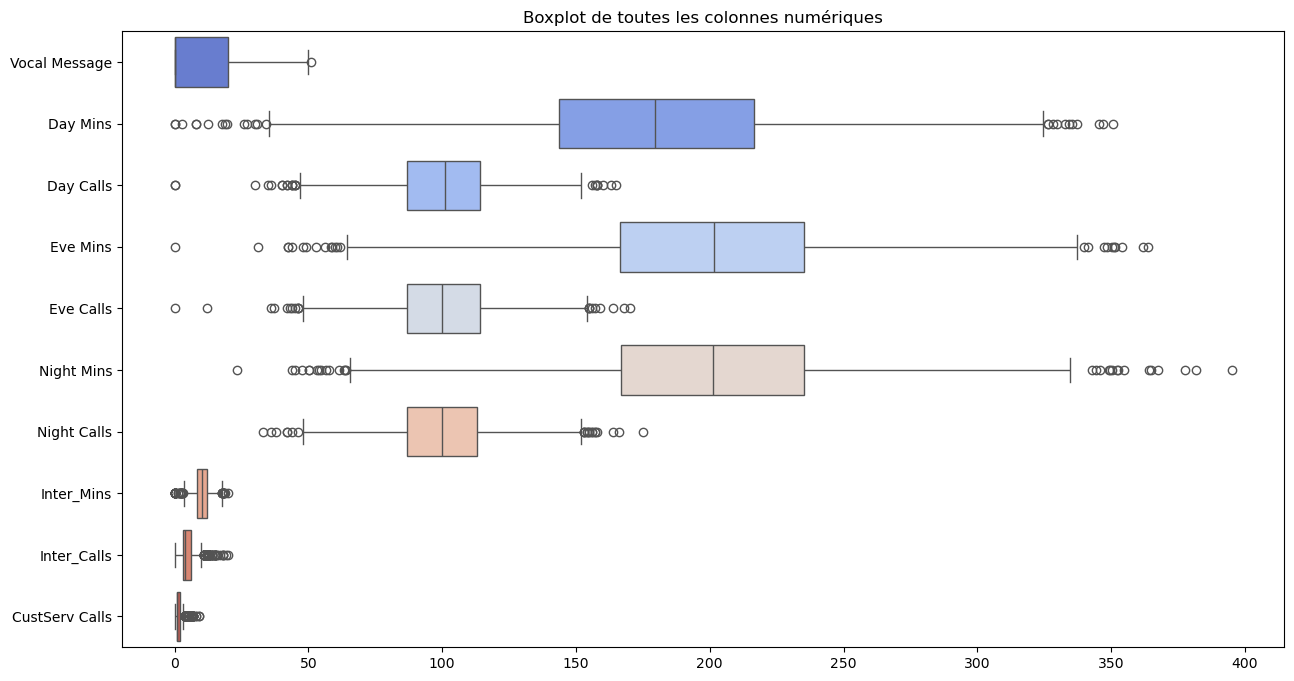

In [932]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df):
    # Sélection des colonnes numériques uniquement
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Création d'un boxplot pour toutes les colonnes numériques
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[numerical_columns], orient="h", palette="coolwarm")
    plt.title("Boxplot de toutes les colonnes numériques")
    plt.show()


plt.figure(figsize=((10,10)))
plot_boxplot(df[['Vocal Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',	
                 'Night Mins','Night Calls','Inter_Mins', 'Inter_Calls', 'CustServ Calls']])


#### Even if the box plots are well balanced, it's easy to see the presence of outliers on the 2 terminal side. 
#### Now let's test our KPIs

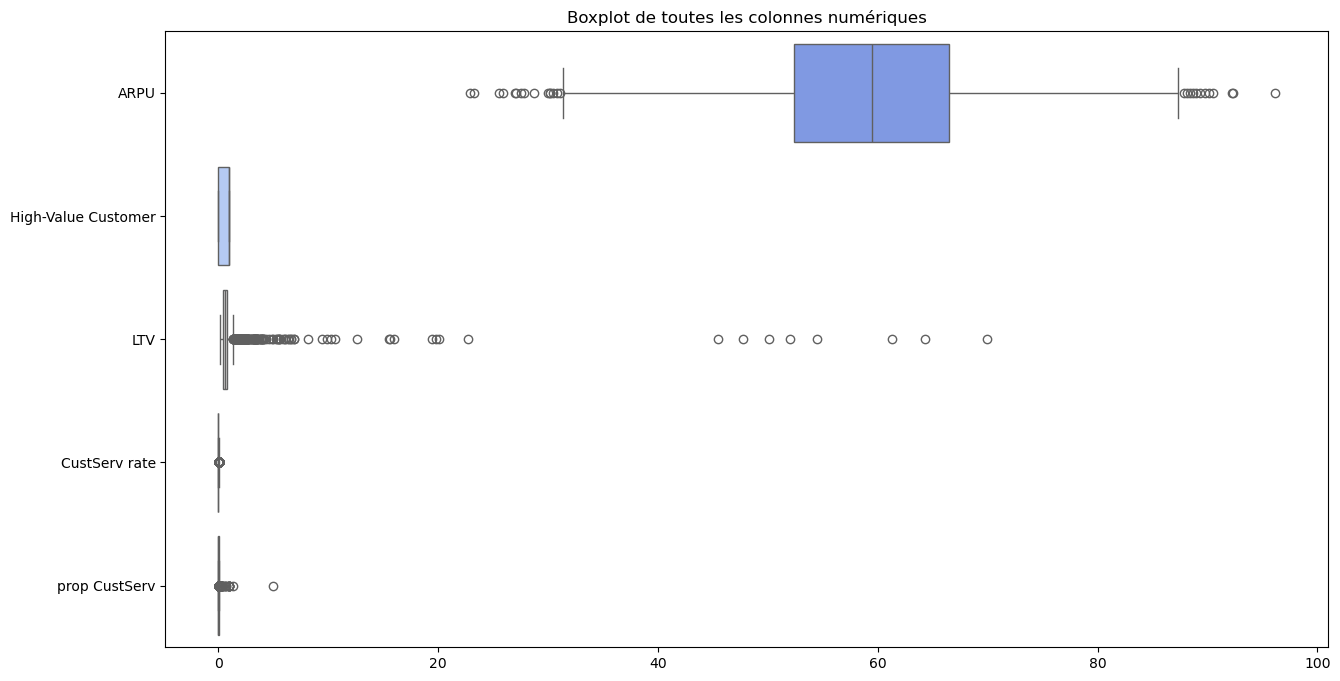

In [933]:
plot_boxplot(df[['ARPU', 'High-Value Customer',	'LTV', 'CustServ rate', 'prop CustServ']])


#### We notice that the LTV is poorly distributed, with many outliers at the upper bound.

#### We are going to rescale these data. We use the standar to be robust to outliers.

In [934]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

high_variance_data=['prop CustServ', 'LTV', 'CustServ rate']
df[high_variance_data]=scaler.fit_transform(df[high_variance_data])

#### As far as states and zones are concerned, we're going to apply a one-hot encoder to Zones, given the low number of classes, and a frequency encoding to States, to avoid exploiting our parameters. 

In [935]:
new_df=pd.get_dummies(df, columns=['Area Code'])

freq_encoding = new_df['State'].value_counts(normalize=True) 
new_df['State']= new_df['State'].map(freq_encoding)

new_df=new_df.drop(columns='Phone')

In [936]:
new_df.head(3)

State  duration  Inter_plan  Vocal Plan  Vocal Message  Day Mins  \
0  0.021002       128           0           1             25     265.1   
1  0.023402       107           0           1             26     161.6   
2  0.020402       137           0           0              0     243.4   

   Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
0        110       45.07     197.4         99       16.78       244.7   
1        123       27.47     195.5        103       16.62       254.4   
2        114       41.38     121.2        110       10.30       162.6   

   Night Calls  Night Charge  Inter_Mins  Inter_Calls  Inter_Charge  \
0           91         11.01        10.0            3          2.70   
1          103         11.45        13.7            3          3.70   
2          104          7.32        12.2            5          3.29   

   CustServ Calls  Churn   ARPU  High-Value Customer       LTV  CustServ rate  \
0               1      0  75.56                  1.0 -0.116257      -0.457307   
1               1      0  59.24                  0.0 -0.128785      -0.509393   
2               0      0  62.29                  1.0 -0.162600      -1.158938   

   prop CustServ  Area Code_408  Area Code_415  Area Code_510  
0      -0.158539          False           True          False  
1      -0.143995          False           True          False  
2      -0.232641          False           True          False

In [937]:
new_df = new_df.rename(columns={
    'Area Code_408': 'Area_1',
    'Area Code_415': 'Area_2', 
    'Area Code_510': 'Area_3'})


In [938]:
new_df['Area_1']=new_df['Area_1'].apply(lambda x: 1 if x==True else 0)
new_df['Area_2']=new_df['Area_2'].apply(lambda x: 1 if x==True else 0)
new_df['Area_3']=new_df['Area_3'].apply(lambda x: 1 if x==True else 0)

### Now all our data has been processed so that it can be interpreted by our model, with as little noise as possible from the outliers.
### Explore the relationships and patterns between these data and targetso,Let's test the correlation of these KPIs with the target with a heatmap to see if they are relevant. 

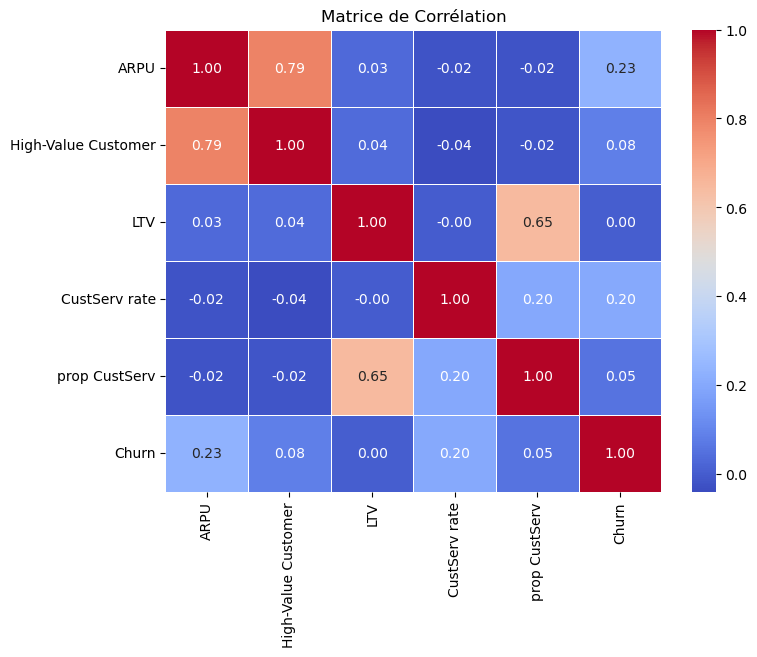

In [939]:
import seaborn as sns
import matplotlib.pyplot as plt
df_KPIs= new_df[['ARPU', 'High-Value Customer','LTV', 'CustServ rate', 'prop CustServ','Churn' ]]

matrice_correlation_KPIs=df_KPIs.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_correlation_KPIs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matrice de Corrélation")
plt.show()

### Clustering may be more revealing, but it's important to note that, in principle, the zones have little or no impact on churn. 

### It should also be borne in mind that there is a major imbalance between the class that Churns and that which does not. 

In [940]:
res=0
for i in range(new_df.shape[0]) : 
    if new_df.loc[i,'Churn']==1 :
        res+=1
    else :
        res+=0

res=round(res/new_df.shape[0], 2)
res

0.14

### The proportion of positive churn (=1) is not at all balanced (14%), so we'll have to oversample our trianing test.

## III. Unsupervised Learning: Customer Clustering

#### Let's try to define groups according to area 

Text(0.5, 1.0, 'elbow methode')

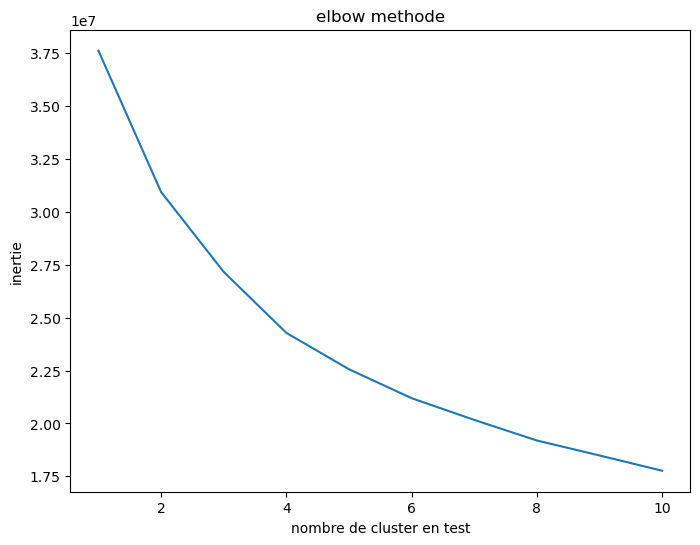

In [941]:
from sklearn.cluster import KMeans

# on test de combien est le nombre optimale de cluster
features = new_df.drop(columns=['Churn'])
nb_cluster=np.arange(1, 11, 1)
inertie=[]
for i in nb_cluster :
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=5)
    inertie.append(kmeans.fit(features).inertia_)

plt.figure(figsize=(8, 6))
plt.plot(nb_cluster, inertie )
plt.xlabel('nombre de cluster en test')
plt.ylabel('inertie')
plt.title('elbow methode')


In [942]:
from sklearn.decomposition import PCA


# Application du clustering avec 2 centroïdes pour tenter de grouper les client avec un haut probabilité de churn et une faible
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5)
features['Cluster'] = kmeans.fit_predict(features)

pca = PCA(n_components=21)  # je met autant de composante que de dimension, mon but ici n'est que de voir le meilleur cluster selon 2 centroides
                            # on testera plus tard si on peut réduire la complexité de notre problème.
reduced_features = pca.fit_transform(features.drop(columns=['Cluster']))



<Axes: >

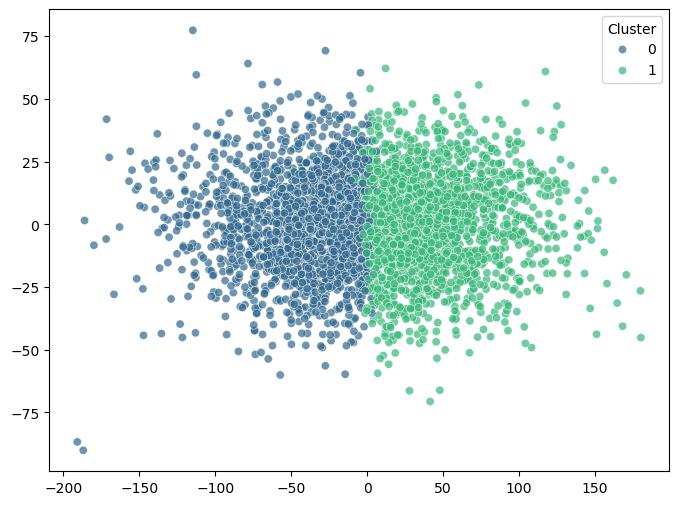

In [943]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:, 4], hue=features['Cluster'], palette="viridis", alpha=0.7) 
# après avoir tester quelques combinaison la PC1 et PC3 donne une meilleur "vu" des clusters


### By clustering directly on the whole data set, the elbow method is not very revealing, so let's try the same on groups of features that might make sense. 

#### - Use of the plan : Day Calls, Eve Calls, Night Calls, Intl Calls
#### - Cost and billing : Day Charge, Eve Charge, Night Charge, Intl Charge
#### - Customer service : CustServ Calls par rapport au couts des services
#### - Special package  Int'l Plan, VMail Plan

In [944]:
df_usage=new_df[['Day Calls', 'Eve Calls', 'Night Calls', 'Inter_Calls']]
df_cost=new_df[['Day Charge', 'Eve Charge', 'Night Charge', 'Inter_Charge']]
df_client_services=new_df[['CustServ Calls','Day Charge', 'Eve Charge', 'Night Charge', 'Inter_Charge']]
df_plan=new_df[['Inter_plan', 'Vocal Plan' ]]

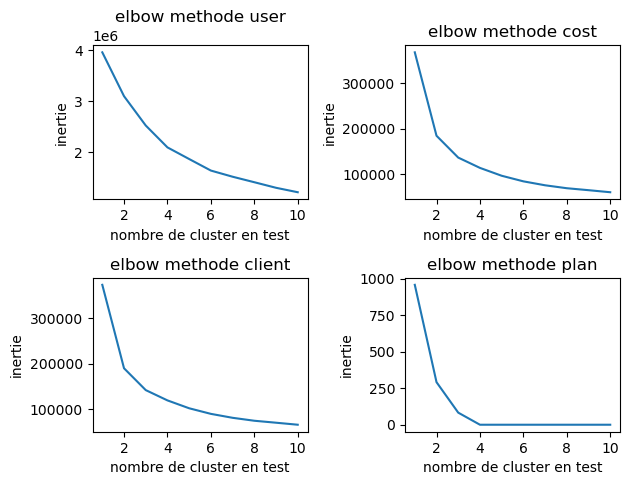

In [945]:
plt.figure(figsize=((12,12)))
nb_cluster=np.arange(1, 11, 1)

inertia_dictionnary={
    "user": ([],df_usage),
    "cost": ([],df_cost),
    "client": ([],df_client_services),
    "plan":([],df_plan)
}

for inertia_key in inertia_dictionnary.keys() :
    data_to_treat=inertia_dictionnary[f"{inertia_key}"][1]

    for i in nb_cluster :
        k = KMeans(n_clusters=i, random_state=42, n_init=5)
        inertia=k.fit(data_to_treat).inertia_ 
        inertia_dictionnary[f"{inertia_key}"][0].append(inertia)

i=1
for inertia_key in inertia_dictionnary.keys() :
    plt.subplot(2,2,i)
    plt.plot(nb_cluster, inertia_dictionnary[inertia_key][0] )
    plt.xlabel('nombre de cluster en test')
    plt.ylabel('inertie')
    plt.title(f'elbow methode {inertia_key}')
    i+=1

plt.tight_layout()

### There's clearly a kink in the 3rd cluster for after-sales service, costs and packages, and usage is unusable at this level, as the curb is far too proportional.

Text(0.5, 1.0, 'repartition of SAV')

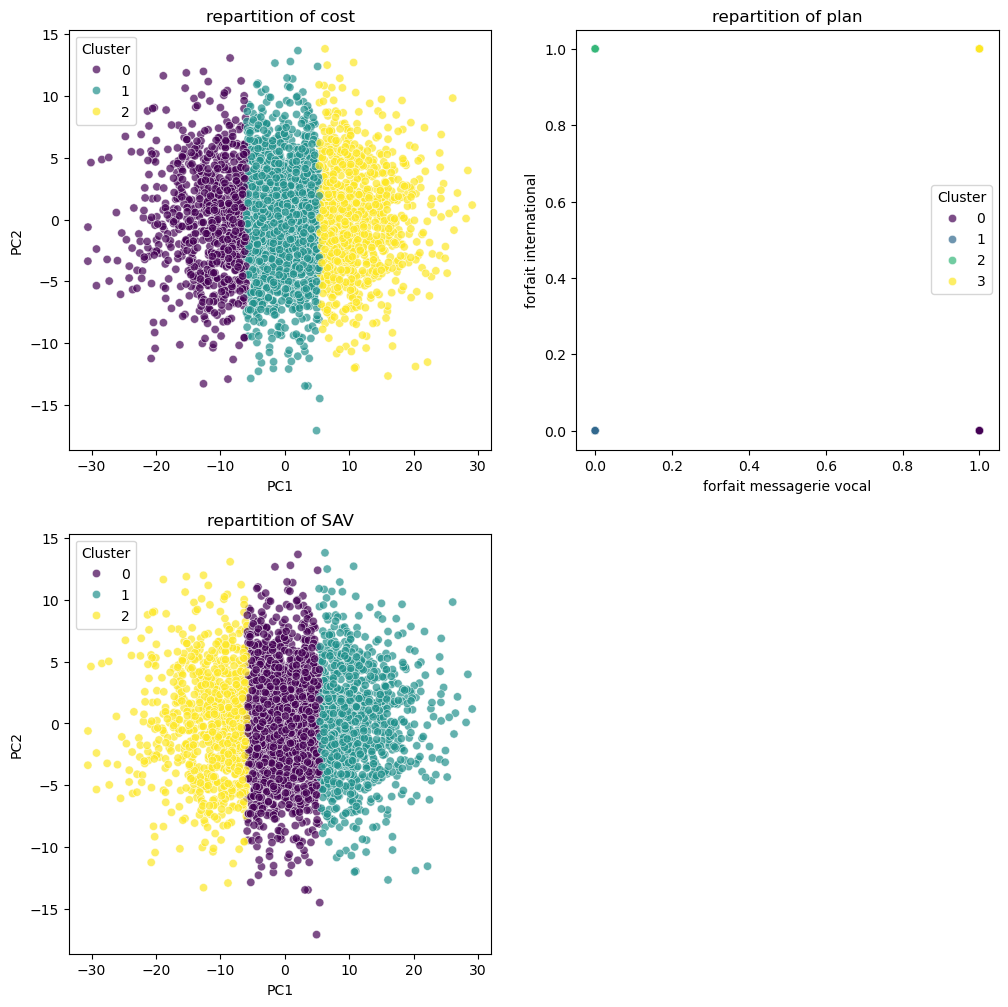

In [946]:
kmeans_cost = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cost['Cluster'] = kmeans_cost.fit_predict(df_cost)

kmeans_plan = KMeans(n_clusters=4, random_state=42, n_init=10)
df_plan['Cluster'] = kmeans_plan.fit_predict(df_plan)

kmeans_SAV = KMeans(n_clusters=3, random_state=42, n_init=10)
df_client_services['Cluster'] = kmeans_SAV.fit_predict(df_client_services)

pca = PCA(n_components=3)  
df_cost_reduced = pca.fit_transform(df_cost.drop(columns=['Cluster']))
df_SAV_reduced = pca.fit_transform(df_client_services.drop(columns=['Cluster']))


plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.scatterplot(x=df_cost_reduced[:, 0], y=df_cost_reduced[:, 1], hue=df_cost['Cluster'], palette="viridis", alpha=0.7) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('repartition of cost')

plt.subplot(2,2,2)
sns.scatterplot(x=df_plan.iloc[:, 0], y=df_plan.iloc[:, 1], hue=df_plan['Cluster'], palette="viridis", alpha=0.7) 
plt.xlabel('forfait messagerie vocal')
plt.ylabel('forfait international')
plt.title('repartition of plan')


plt.subplot(2,2,3)
sns.scatterplot(x=df_SAV_reduced[:, 0], y=df_SAV_reduced[:, 1], hue=df_client_services['Cluster'], palette="viridis", alpha=0.7) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('repartition of SAV')

### The clusters formed don't look very meaningful on the graph, so let's see if they add anything from a correlation point of view.

In [947]:
kmeans_df = pd.DataFrame({
    'cost_cluster': df_cost['Cluster'],
    'SAV_cluster': df_client_services['Cluster'],
    'Chrun': new_df['Churn'],
    'plan': df_plan['Cluster'],
})

<Axes: >

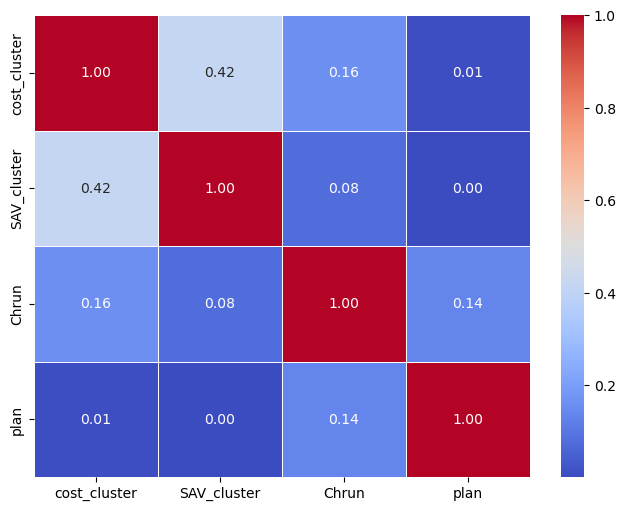

In [948]:
matrice_correlation=abs(kmeans_df.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### We compare the average costs in each cluster centroid to see if they are constant or not.  

In [949]:
kmeans_cost.fit(df_cost).cluster_centers_

array([[3.02403056e+01, 1.70141287e+01, 9.06692458e+00, 2.77795189e+00,
        1.00000000e+00],
       [1.89583138e+01, 1.70661358e+01, 8.98738876e+00, 2.77686183e+00,
        1.77635684e-15],
       [4.16197450e+01, 1.72127843e+01, 9.04134963e+00, 2.73158342e+00,
        2.00000000e+00]])

#### We can clearly see that clusters are governed by “day charge”, while for the other classes there is little or no difference between the different cluster centroids. We will therefore only use the “day charge” field.

### We can try to redefine df_client_services by removing the fields “eve”, “int”, “night”.

Text(0.5, 1.0, 'repartition of plan')

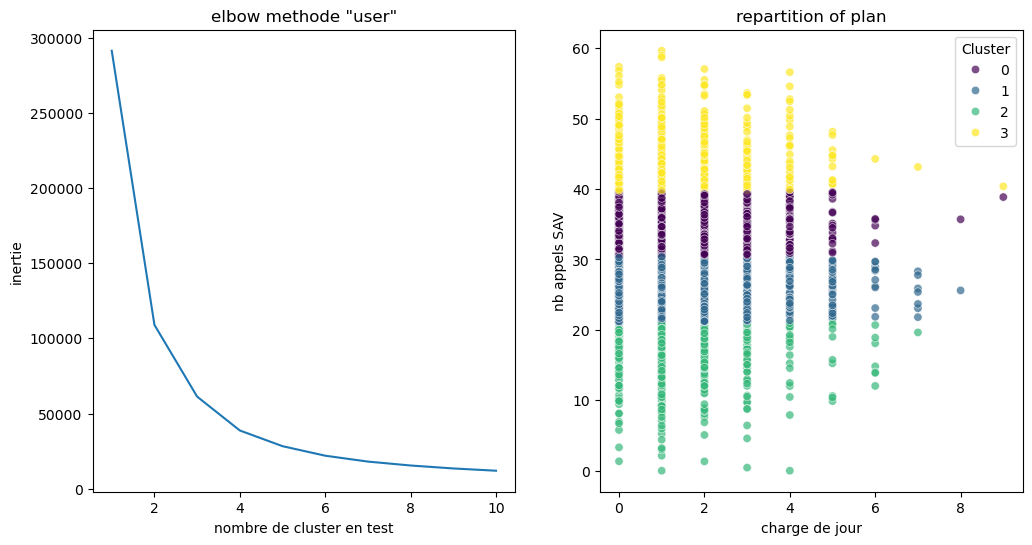

In [950]:
df_client_service_V2=new_df[['CustServ Calls','Day Charge']]


inertie_SAV_V2=[]
for i in nb_cluster :
    k_SAV_V2 = KMeans(n_clusters=i, random_state=42, n_init=5)
    inertie_SAV_V2.append(k_SAV_V2.fit(df_client_service_V2).inertia_)

plt.figure(figsize=((12,6)))
plt.subplot(1,2,1)
plt.plot(nb_cluster, inertie_SAV_V2 )
plt.xlabel('nombre de cluster en test')
plt.ylabel('inertie')
plt.title('elbow methode "user"')

kmeans_SAV_V2 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_client_service_V2['Cluster'] = kmeans_SAV_V2.fit_predict(df_client_service_V2)

plt.subplot(1,2,2)
sns.scatterplot(x=df_client_service_V2.iloc[:, 0],y=df_client_service_V2.iloc[:, 1],hue=df_client_service_V2['Cluster'],palette="viridis",alpha=0.7)
plt.xlabel('charge de jour')
plt.ylabel('nb appels SAV')
plt.title('repartition of plan')

<Axes: >

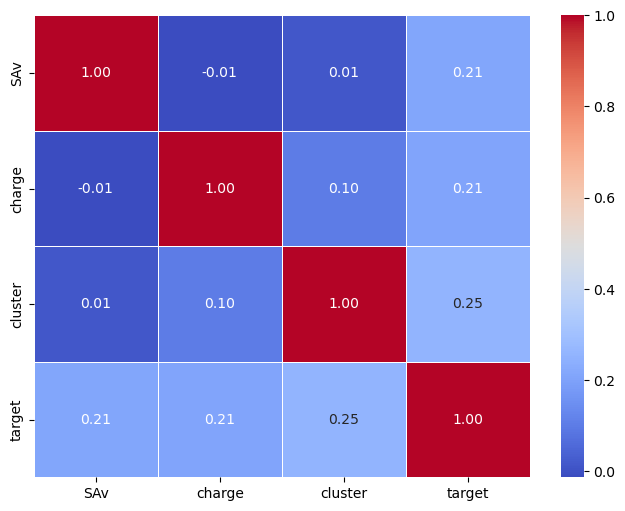

In [951]:
df_SAV2_cluster=pd.DataFrame({
    "SAv": df_client_service_V2['CustServ Calls'],
    "charge": df_client_service_V2['Day Charge'],
    "cluster": df_client_service_V2['Cluster'],
    "target": new_df['Churn']
})
matrice_correlation=df_SAV2_cluster.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### We therefore observe that :
- daily loads are more correlated with chrun than total load clusters, 
- the number of after-sales calls is more correlated than the number of after-sales calls and total load clusters
- the cluster between daily load and after-sales service is well correlated with churn and very poorly correlated with after-sales service and load.

### So all 3 data can be fully exploited

In [952]:
new_df['Cluster_cost_SAV']=df_SAV2_cluster['cluster']

### We will try to determine hidden structures within the KIPs that have the highest correlation with Churn.

Text(0.5, 1.0, 'elbow methode "KPIs"')

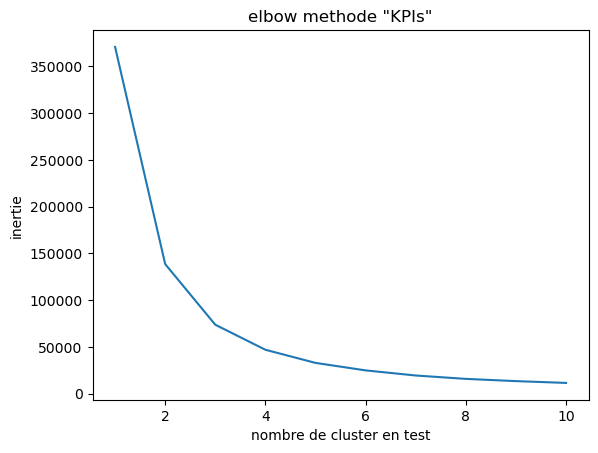

In [953]:
df_KPIs=new_df[['ARPU', 'CustServ rate']]
inertie_KPIs=[]

for i in nb_cluster :
    k_KPIs = KMeans(n_clusters=i, random_state=42, n_init=5)
    inertie_KPIs.append(k_KPIs.fit(df_KPIs).inertia_)

plt.plot(nb_cluster, inertie_KPIs )
plt.xlabel('nombre de cluster en test')
plt.ylabel('inertie')
plt.title('elbow methode "KPIs"')

Text(0.5, 1.0, 'repartition of client based on their ')

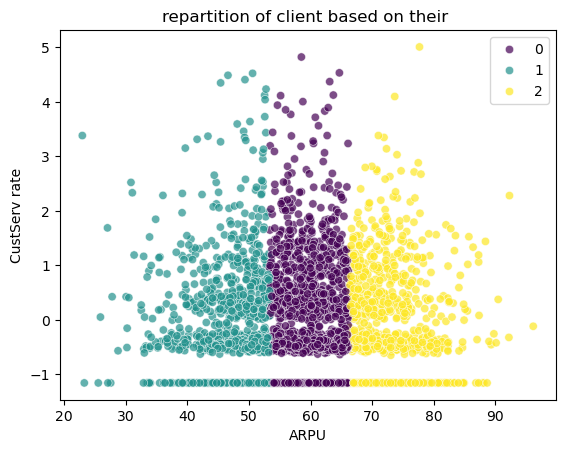

In [954]:
k_KPIs = KMeans(n_clusters=3, random_state=42, n_init=5)
labels= k_KPIs.fit_predict(df_KPIs)

sns.scatterplot(x=df_KPIs.iloc[:, 0], y=df_KPIs.iloc[:, 1], hue=labels, palette="viridis", alpha=0.7) 
plt.xlabel('ARPU')
plt.ylabel('CustServ rate')
plt.title('repartition of client based on their ')

In [955]:
df_KPIs_cluster=pd.DataFrame({
    "ARPU": new_df['ARPU'], 
    "CustServ rate": new_df['CustServ rate'],
    "Cluster": labels,
    "Churn": new_df['Churn'] 
})

<Axes: >

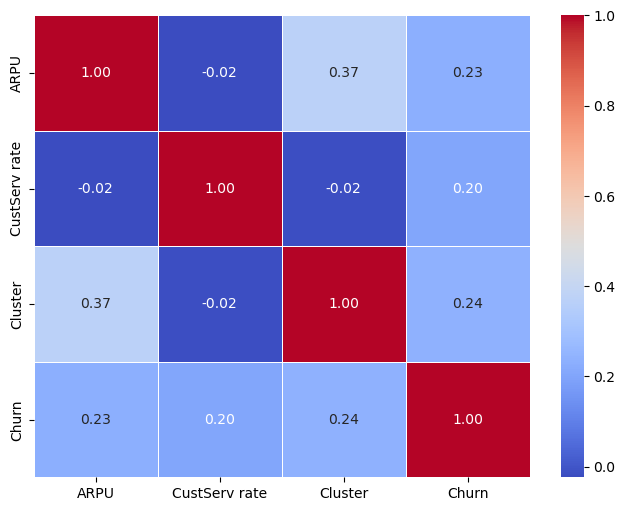

In [956]:
matrice_correlation=df_KPIs_cluster.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [957]:
new_df['Cluster_revenu_SAV_rate']=df_KPIs_cluster['Cluster']

### We're trying to explore whether there's a pattern between the cost of service and the package chosen that could be interesting for churn, as well as between the recurrence of service calls and packages.

In [958]:
df_plan_clusters= pd.DataFrame ({
    "ARPU": new_df['ARPU'],
    "SAV":new_df['CustServ Calls'],
    "plan_clust": kmeans_df['plan'],
    "target": new_df['Churn']
})


Text(0.5, 1.0, 'plan by ARPU')

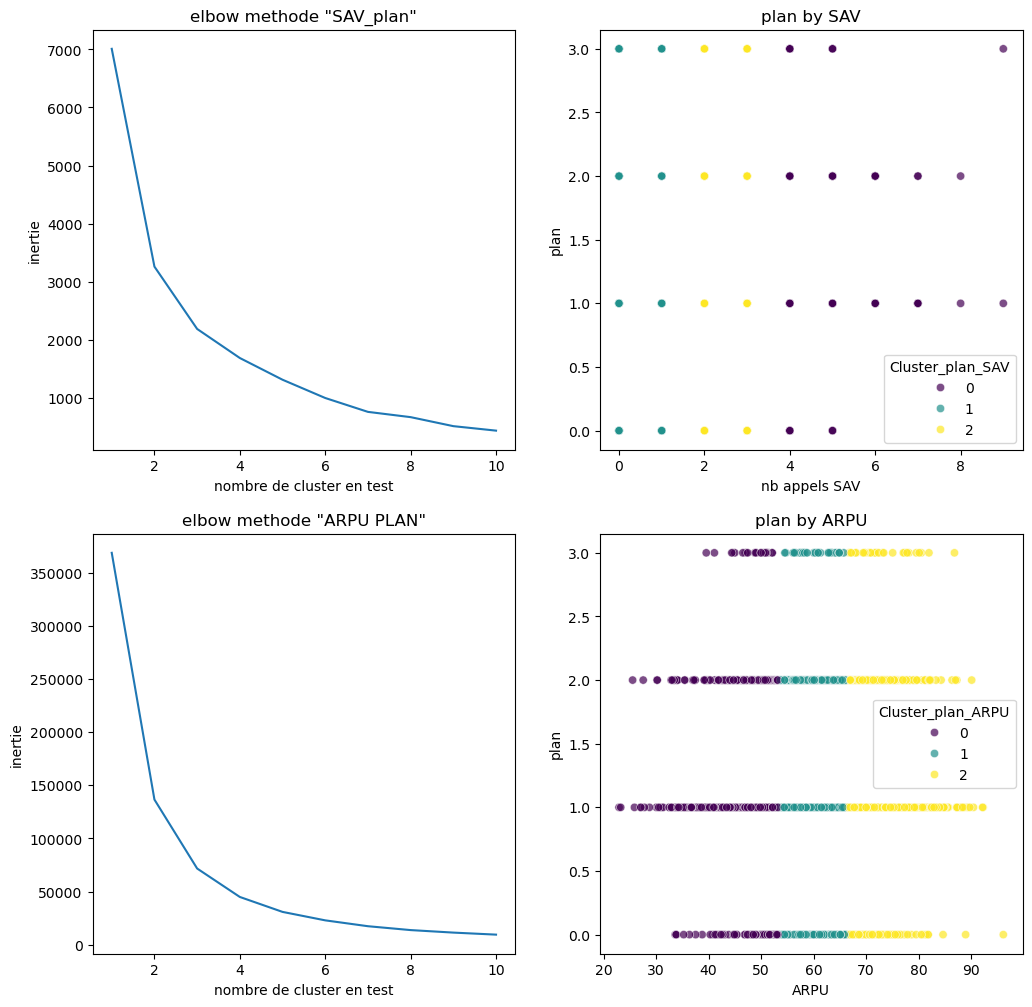

In [959]:
inertie_Plan_SAV=[]
for i in nb_cluster :
    kmeans_plan_SAV = KMeans(n_clusters=i, random_state=42, n_init=5)
    inertie_Plan_SAV.append(kmeans_plan_SAV.fit(df_plan_clusters[['SAV', 'plan_clust']]).inertia_)

plt.figure(figsize=((12,12)))
plt.subplot(2,2,1)
plt.plot(nb_cluster, inertie_Plan_SAV )
plt.xlabel('nombre de cluster en test')
plt.ylabel('inertie')
plt.title('elbow methode "SAV_plan"')

kmeans_plan_SAV = KMeans(n_clusters=3, random_state=42, n_init=10)
df_plan_clusters['Cluster_plan_SAV'] = kmeans_plan_SAV.fit_predict(df_plan_clusters[['SAV', 'plan_clust']])

plt.subplot(2,2,2)
sns.scatterplot(x=df_plan_clusters.iloc[:, 1],y=df_plan_clusters.iloc[:, 2],hue=df_plan_clusters['Cluster_plan_SAV'],palette="viridis",alpha=0.7)
plt.ylabel('plan')
plt.xlabel('nb appels SAV')
plt.title('plan by SAV')


inertie_Plan_ARPU=[]
for i in nb_cluster :
    kmeans_plan_ARPU = KMeans(n_clusters=i, random_state=42, n_init=5)
    inertie_Plan_ARPU.append(kmeans_plan_ARPU.fit(df_plan_clusters[['ARPU', 'plan_clust']]).inertia_)

plt.subplot(2,2,3)
plt.plot(nb_cluster, inertie_Plan_ARPU )
plt.xlabel('nombre de cluster en test')
plt.ylabel('inertie')
plt.title('elbow methode "ARPU PLAN"')

kmeans_plan_ARPU = KMeans(n_clusters=3, random_state=42, n_init=10)
df_plan_clusters['Cluster_plan_ARPU'] = kmeans_plan_ARPU.fit_predict(df_plan_clusters[['ARPU', 'plan_clust']])

plt.subplot(2,2,4)
sns.scatterplot(x=df_plan_clusters.iloc[:, 0],y=df_plan_clusters.iloc[:, 2],hue=df_plan_clusters['Cluster_plan_ARPU'],palette="viridis",alpha=0.7)
plt.xlabel('ARPU')
plt.ylabel('plan')
plt.title('plan by ARPU')

<Axes: >

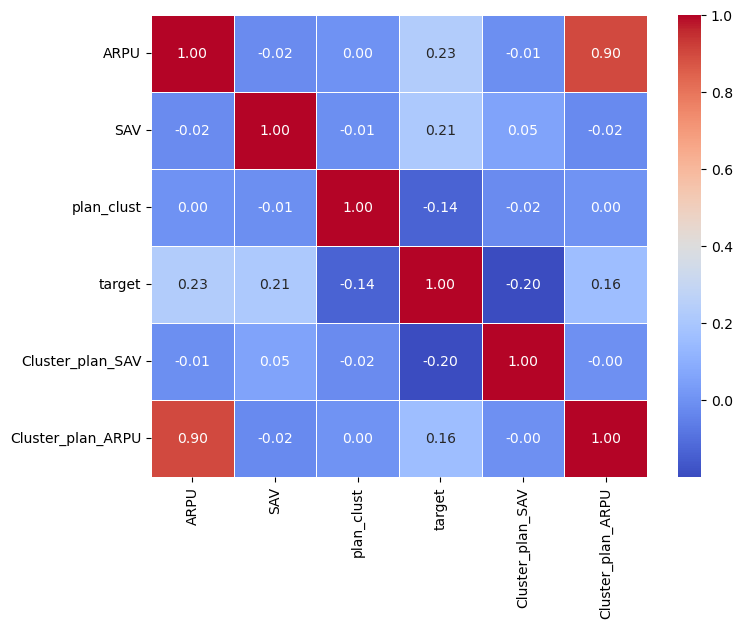

In [960]:
matric_corr_plan_cluster=df_plan_clusters.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matric_corr_plan_cluster,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

## Observation and conclusion: 

- #### All features can have a good impact on the target 
- #### Cluster_plan_SAV correlates well with target and is fairly independent of other features
- #### Cluster_plan_ARPU is much too correlated to ARPU (which will increase the variance during prediction for nothing) because the correlation of this cluster to the target is inferior to that of ARPU. 

## Conclusion : ARPU , SAV, PLAN clust , Cluster_plan_SAV

In [961]:
new_df['Cluster_plan_SAV']=df_plan_clusters['Cluster_plan_SAV']

## Here's the final dataset we'll be working with for our models

In [962]:
new_df.head()

State  duration  Inter_plan  Vocal Plan  Vocal Message  Day Mins  \
0  0.021002       128           0           1             25     265.1   
1  0.023402       107           0           1             26     161.6   
2  0.020402       137           0           0              0     243.4   
3  0.023402        84           1           0              0     299.4   
4  0.018302        75           1           0              0     166.7   

   Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
0        110       45.07     197.4         99       16.78       244.7   
1        123       27.47     195.5        103       16.62       254.4   
2        114       41.38     121.2        110       10.30       162.6   
3         71       50.90      61.9         88        5.26       196.9   
4        113       28.34     148.3        122       12.61       186.9   

   Night Calls  Night Charge  Inter_Mins  Inter_Calls  Inter_Charge  \
0           91         11.01        10.0            3          2.70   
1          103         11.45        13.7            3          3.70   
2          104          7.32        12.2            5          3.29   
3           89          8.86         6.6            7          1.78   
4          121          8.41        10.1            3          2.73   

   CustServ Calls  Churn   ARPU  High-Value Customer       LTV  CustServ rate  \
0               1      0  75.56                  1.0 -0.116257      -0.457307   
1               1      0  59.24                  0.0 -0.128785      -0.509393   
2               0      0  62.29                  1.0 -0.162600      -1.158938   
3               2      0  66.80                  1.0 -0.046242       0.633178   
4               3      0  52.09                  0.0 -0.080649       0.716007   

   prop CustServ  Area_1  Area_2  Area_3  Cluster_cost_SAV  \
0      -0.158539       0       1       0                 3   
1      -0.143995       0       1       0                 1   
2      -0.232641       0       1       0                 3   
3      -0.006805       1       0       0                 3   
4       0.146764       0       1       0                 1   

   Cluster_revenu_SAV_rate  Cluster_plan_SAV  
0                        2                 1  
1                        0                 1  
2                        0                 1  
3                        2                 2  
4                        1                 2

# IV. Supervised ML 

## 1. Split du data set en Train Test 

## 2. Features Selection 

#### - PCA Reduction 
#### - matrix correlation 
#### - Oversampling 
#### - RFE Selection  


## 3. Model training 

#### - Regression logistique  
- hyper parameter tuning
#### - Random Forest 
#### - Decision Tree  


## 4. Model selection 


## 1. Split du data set en Train et en Test

In [963]:
from sklearn.model_selection import train_test_split

# Définition des features (X) et de la cible (y)
X = new_df.drop(columns=['Churn'])  # Remplace 'Churn' par ta colonne cible
y = new_df['Churn']  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



## 2. Features Selection 

### We start by creating three different Train 

- PCA 
- According to the correlation matrix 


Text(0.5, 1.0, 'variance cumulé')

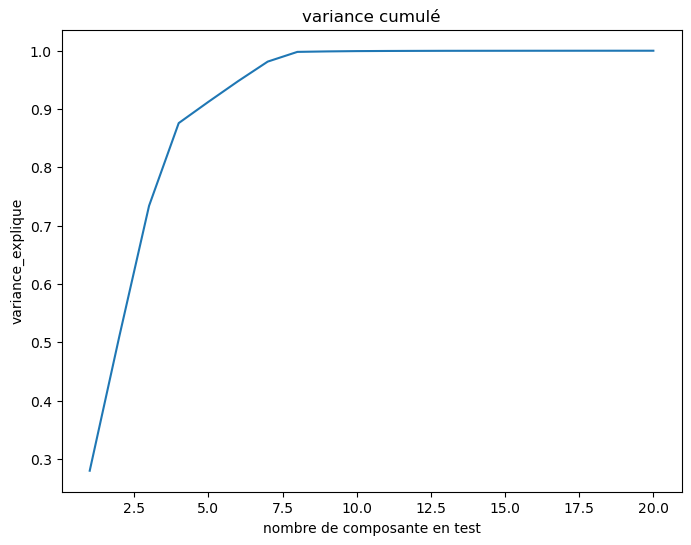

In [964]:
from sklearn.decomposition import PCA

nb_composante_principale=np.arange(1, 21, 1)
variance_explique=[]
for i in nb_composante_principale :
    pca = PCA(n_components=i)
    pca.fit(X_train)
    variance_explique.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(nb_composante_principale, variance_explique )
plt.xlabel('nombre de composante en test')
plt.ylabel('variance_explique')
plt.title('variance cumulé')

#### We can reduce the complexity from 21 to 8 dimensions while maintaining 100% of the total information, which will be useful in optimizing our predictive models. 

In [965]:
pca = PCA(n_components=8)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)


## Correlation matrix for features selection based on most correlated featurs with target and low internal correlation 

- Selection of features most correlated with target

<Axes: >

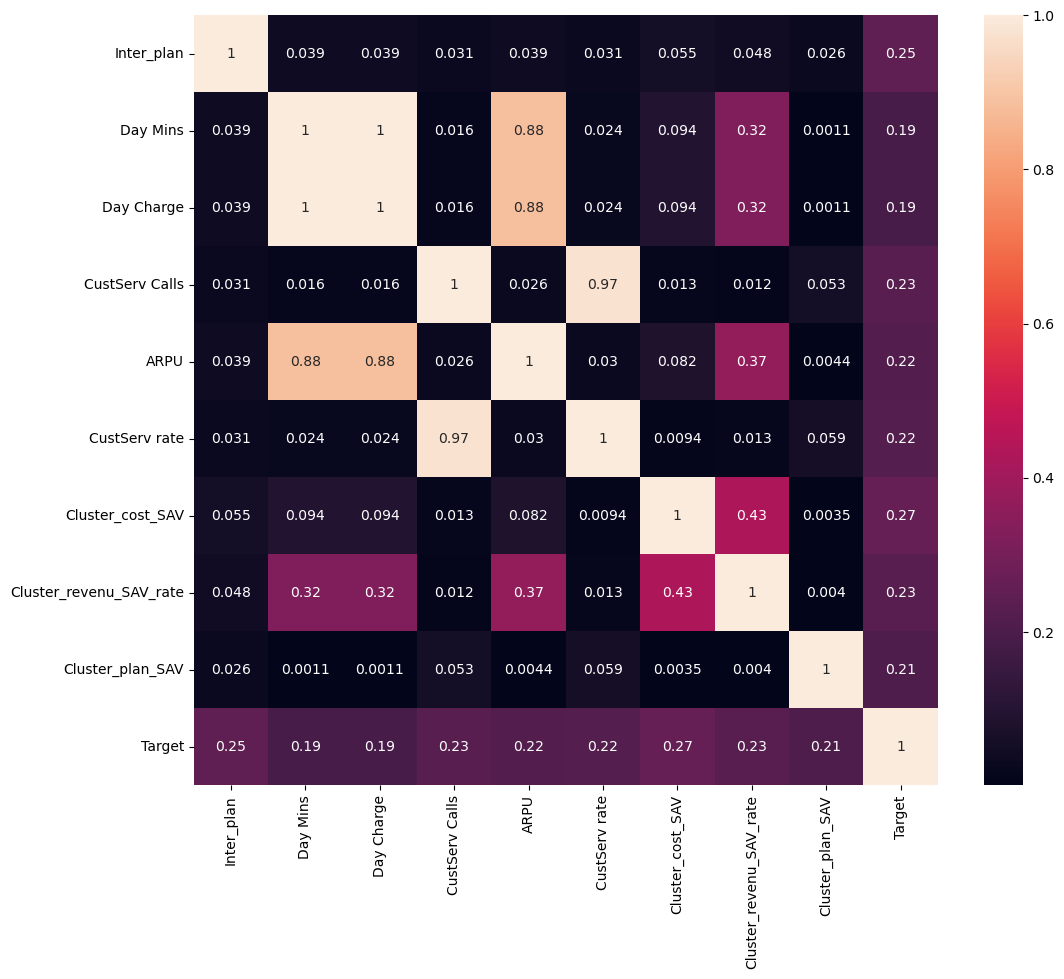

In [966]:
matrice_train=X_train
matrice_train['Target']=y_train

matrix_corr=abs(matrice_train.corr())
corr_target=pd.DataFrame(matrix_corr.iloc[-1,:])
features_high_corr=corr_target.apply(lambda x: x[x>x.mean()], axis=0)
matrix_high_corr=matrice_train[features_high_corr.index]

plt.figure(figsize=((12,10)))
sns.heatmap(abs(matrix_high_corr.corr()), annot=True)


### - We only keep features that are not highly correlated with each other:

In [967]:
matrix_high_corr.corr().columns

Index(['Inter_plan', 'Day Mins', 'Day Charge', 'CustServ Calls', 'ARPU',
       'CustServ rate', 'Cluster_cost_SAV', 'Cluster_revenu_SAV_rate',
       'Cluster_plan_SAV', 'Target'],
      dtype='object')

In [968]:
col_corr_clean=['Inter_plan', 'CustServ Calls', 'ARPU',
       'Cluster_cost_SAV', 'Cluster_revenu_SAV_rate',
       'Cluster_plan_SAV' ]

In [969]:
X_train_corr=X_train[col_corr_clean]
X_test_corr=X_test[col_corr_clean]
X_train_corr.head()

Inter_plan  CustServ Calls   ARPU  Cluster_cost_SAV  \
3286           0               0  66.98                 0   
86             0               4  50.71                 1   
1349           0               2  49.31                 1   
1649           0               0  38.59                 2   
3000           0               3  65.72                 0   

      Cluster_revenu_SAV_rate  Cluster_plan_SAV  
3286                        2                 1  
86                          1                 0  
1349                        1                 2  
1649                        1                 1  
3000                        0                 2

In [970]:
X_train=X_train.drop("Target", axis=1)

### We're going to apply oversampling to our X_train to avoid underfitting, since our target is very much in the minority in the dataset. 

In [971]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

# Application de SMOTE pour équilibrer le dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### We iterate the previous processes to see if there is any new information. 

- PCA 
- correlation based 

Text(0.5, 1.0, 'variance cumulé')

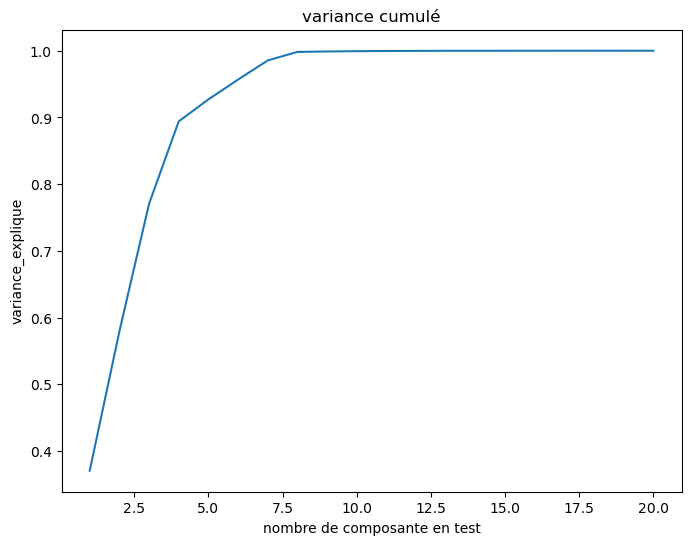

In [972]:
nb_composante_principale=np.arange(1, 21, 1)
variance_explique=[]
for i in nb_composante_principale :
    pca_smote = PCA(n_components=i)
    pca_smote.fit(X_train_resampled)
    variance_explique.append(np.sum(pca_smote.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(nb_composante_principale, variance_explique )
plt.xlabel('nombre de composante en test')
plt.ylabel('variance_explique')
plt.title('variance cumulé')

In [973]:
X_train_PCA_smote = pca_smote.fit_transform(X_train_resampled)
X_test_PCA_smote = pca_smote.fit_transform(X_test)


## Correlation matrix for features selection based on most correlated featurs with target and low internal correlation 

- Selection of features most correlated with target

<Axes: >

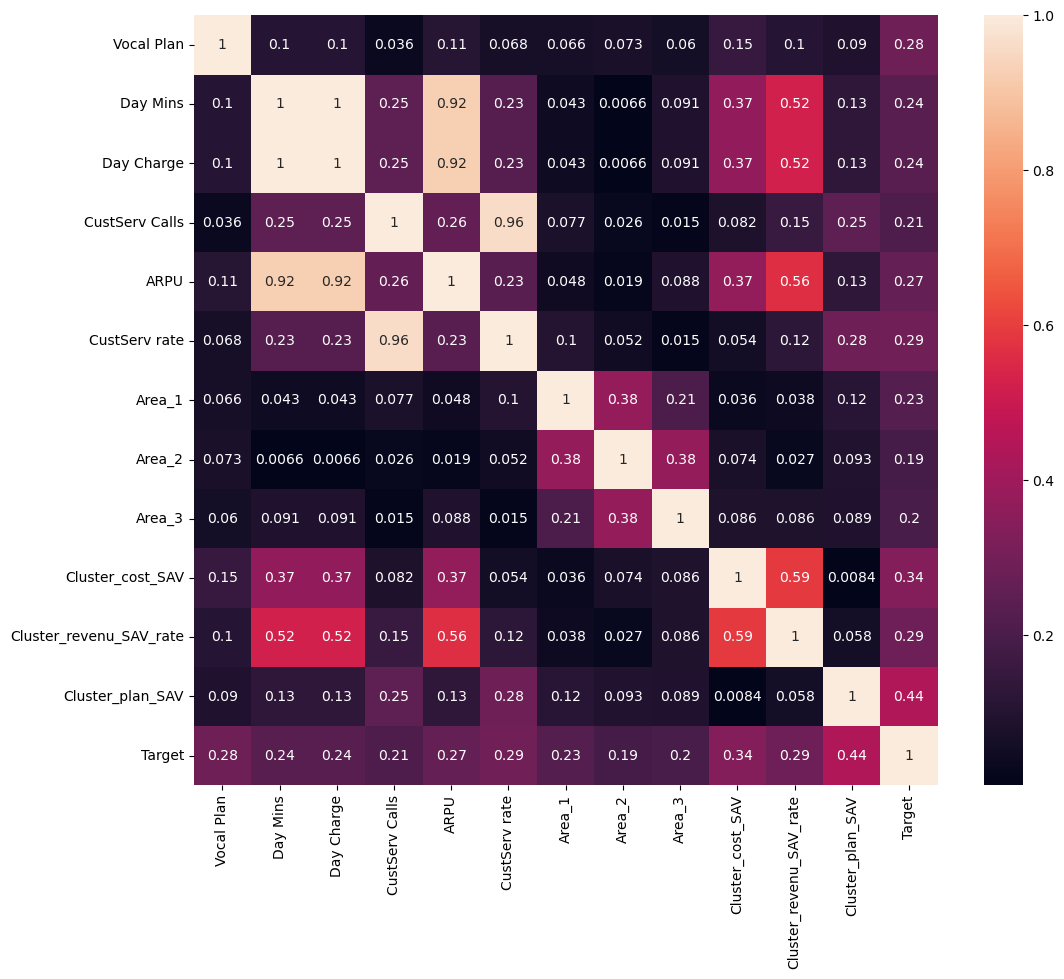

In [974]:
matrice_train_resampled=X_train_resampled
matrice_train_resampled['Target']=y_train_resampled

matrix_corr_resampled=abs(matrice_train_resampled.corr())
corr_target_resampled=pd.DataFrame(matrix_corr_resampled.iloc[-1,:])
features_high_corr_resampled=corr_target_resampled.apply(lambda x: x[x>x.mean()], axis=0)
matrix_high_corr_resampled=matrice_train_resampled[features_high_corr_resampled.index]

plt.figure(figsize=((12,10)))
sns.heatmap(abs(matrix_high_corr_resampled.corr()), annot=True)

### This time, the “Cluster_revenu_SAV_rate” is far too correlated with the other features, so we don't keep it.

- we add the inter_plan feature anyway 
- we keep the areas that didn't appear before

In [975]:
matrix_high_corr_resampled.corr().columns

Index(['Vocal Plan', 'Day Mins', 'Day Charge', 'CustServ Calls', 'ARPU',
       'CustServ rate', 'Area_1', 'Area_2', 'Area_3', 'Cluster_cost_SAV',
       'Cluster_revenu_SAV_rate', 'Cluster_plan_SAV', 'Target'],
      dtype='object')

In [976]:
matrix_high_corr_resampled.corr().columns

col_corr_clean_smote=['Inter_plan', 'Vocal Plan', 'ARPU', 'CustServ rate',
       'Area_1','Area_2', 'Area_3', 'Cluster_cost_SAV',
       'Cluster_plan_SAV']

X_train_corr_resampled=X_train_resampled[col_corr_clean_smote]
X_test_corr_resampled=X_test[col_corr_clean_smote]


In [977]:
X_train_resampled=X_train_resampled.drop("Target", axis=1)


#### Features selection based on recursive features elimination with cross validation

In [980]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression as rlog


# Initialisation du modèle
model = rlog(max_iter=100)

# Application de RFECV (choix automatique du nombre de features optimales)
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='precision', min_features_to_select=10)
X_train_rfecv = rfecv.fit_transform(X_train_resampled, y_train_resampled)

selected_features = X_train_resampled.columns[rfecv.support_]

In [981]:
X_train_RFE_selected=X_train_resampled[selected_features]
X_test_RFE_selected=X_test[selected_features]


## 3. Model training 

#### - Regression logistique  

### To compare our models, we're going to base ourselves on accuracy, because it's more relevant to focus on detecting customers who churn, even if it means prospecting for cleintqs who won't actually churn, rather than missing out on customers who will actually churn. 

### here, false positives are less serious than false negatives

In [982]:
from sklearn.metrics import classification_report, recall_score

### We implement a logistic regression model on the different feature selections we've made and compare the accuracy of the results.

In [983]:
from sklearn.linear_model import LogisticRegression as rlog

dictionnair_score_logistic_regression={
    "regression_simple" :(X_train, X_test, y_train, y_test),
    "regression_PCA " :(X_train_PCA, X_test_PCA, y_train, y_test),
    "regression_corr" :(X_train_corr, X_test_corr, y_train, y_test),
    "regression_PCA_SMOTE" :(X_train_PCA_smote, X_test_PCA_smote, y_train_resampled, y_test),
    "regression_corr_SMOTE" :(X_train_corr_resampled, X_test_corr_resampled, y_train_resampled, y_test)
}

for cle_reg, value_reg in dictionnair_score_logistic_regression.items():

    train_x, test_x, train_y, test_y = value_reg

    logistic_regressor=rlog()
    logistic_regressor.fit(train_x, train_y)
    y_pred=logistic_regressor.predict(test_x)

    print("-" * 55) 
    print(f"score pour, {cle_reg}")
    print("-" * 55) 
    print(classification_report(test_y, y_pred))

-------------------------------------------------------
score pour, regression_simple
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.50      0.24      0.32        97

    accuracy                           0.85       667
   macro avg       0.69      0.60      0.62       667
weighted avg       0.83      0.85      0.83       667

-------------------------------------------------------
score pour, regression_PCA 
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       570
           1       1.00      0.02      0.04        97

    accuracy                           0.86       667
   macro avg       0.93      0.51      0.48       667
weighted avg       0.88      0.86      0.79       667

-------------------------------------------------------
score po


#### - Random Forest 


## Warning: the Test cell takes 40 seconds to load.

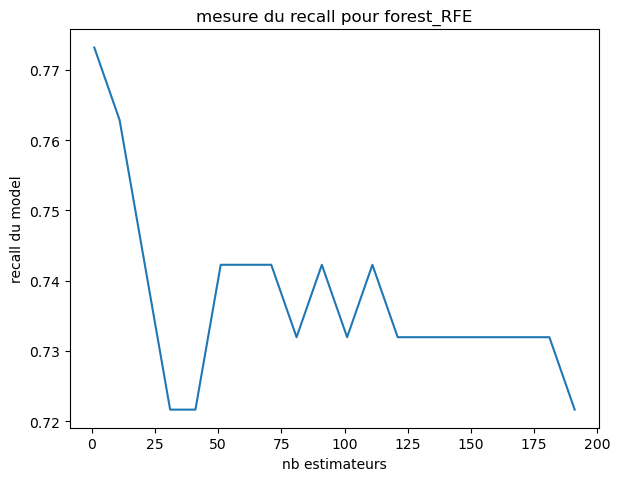

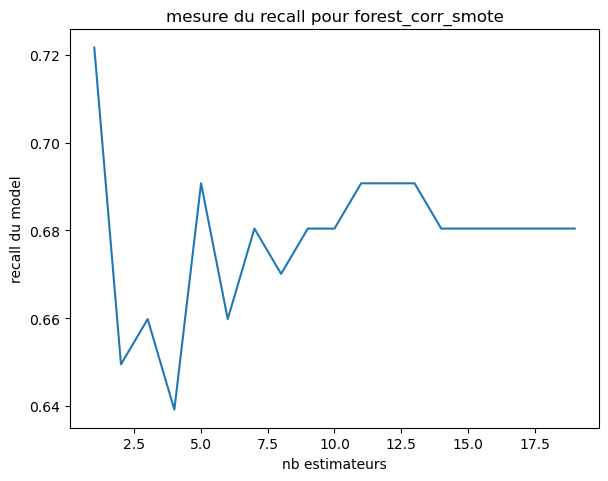

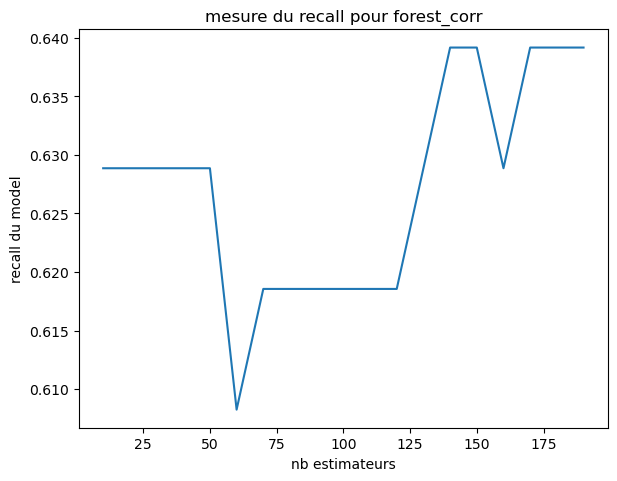

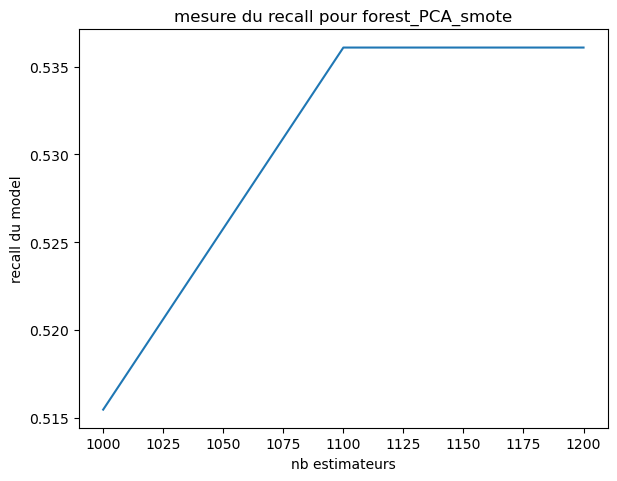

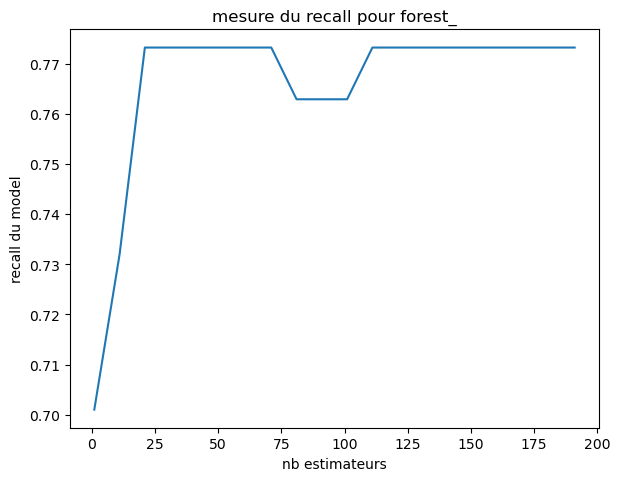

In [984]:
from sklearn.ensemble import RandomForestClassifier

score_forest_RFE=[]
score_forest_corr_smote=[]
score_forest_corr=[]
score_forest_PCA_smote=[]
score_forest_=[]

nb_estimator_RFE=range(1,200, 10)
nb_estimator_corr_smote=range(1,20)
nb_estimator_corr=range(10,200, 10)
nb_estimator_PCA_smote=range(1000,1300, 100)
nb_estimator_=range(1,200, 10)

#on créer un dictionnaire pour stocker une model à chaque features selection faites au préalable
dictionary_test_random_forest={
    "forest_RFE" : (score_forest_RFE,nb_estimator_RFE,X_train_RFE_selected, y_train_resampled,y_test, X_test_RFE_selected), 
    "forest_corr_smote" : (score_forest_corr_smote,nb_estimator_corr_smote,X_train_corr_resampled, y_train_resampled,y_test, X_test_corr_resampled),
    "forest_corr" : (score_forest_corr,nb_estimator_corr, X_train_corr, y_train,y_test, X_test_corr),
    "forest_PCA_smote" : (score_forest_PCA_smote,nb_estimator_PCA_smote,X_train_PCA_smote, y_train_resampled,y_test, X_test_PCA_smote),
    "forest_" : (score_forest_,nb_estimator_,X_train, y_train,y_test, X_test)
}

plt.figure(figsize=((15,30)))

j=1
for cle, valeur in dictionary_test_random_forest.items():   #grâce à notre dictionnaire on peut alléger l'écriture des test en une seul boucle. 

    score, estimator, train_x, train_y, test_y, test_x=valeur
    for i in estimator: 
        forest=RandomForestClassifier(n_estimators=i, random_state=42)
        forest.fit(train_x, train_y)
        score.append(recall_score(test_y, forest.predict(test_x)))

    
    plt.subplot(5,2,j)
    plt.plot(estimator, score)
    plt.title(f"mesure du recall pour {cle}")
    plt.xlabel('nb estimateurs')
    plt.ylabel('recall du model')
    j+=1

## We will now measure our scores by selecting the best estimators for each model.

In [985]:
liste_best_estimator=[60,11,140,1100,25]

i=0
for cle in dictionary_test_random_forest.keys() :
    old_vlues=list(dictionary_test_random_forest[cle])
    old_vlues.append(liste_best_estimator[i])
    dictionary_test_random_forest[cle]=tuple(old_vlues)
    i+=1


for cle_forest, value_forest in dictionary_test_random_forest.items():

    score, nb_estimateur, train_x, train_y, test_y, test_x, estimateur = value_forest

    forest=RandomForestClassifier(n_estimators=estimateur, random_state=42)
    forest.fit(train_x, train_y)

    print("-" * 55) 
    print(f"score pour : {cle_forest}")
    print("-" * 55) 
    print(classification_report(test_y, forest.predict(test_x)))

-------------------------------------------------------
score pour : forest_RFE
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.91      0.74      0.82        97

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.90       667
weighted avg       0.95      0.95      0.95       667

-------------------------------------------------------
score pour : forest_corr_smote
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.79      0.69      0.74        97

    accuracy                           0.93       667
   macro avg       0.87      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

-------------------------------------------------------
score pour 

#### - Decision Tree  

In [986]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


### We're going to choose a good configuration for our decision tree based on recall

In [987]:
param_grid={
    "max_depth" : [3,5,7,10]
}

tree=DecisionTreeClassifier(criterion="entropy", random_state=42, splitter="best", max_features=None)  
#entropy permettra un meilleur équilibrage des classes au vu de la différence de fréquence entre Churn et non Churn

grid_search = GridSearchCV(
    tree, param_grid, 
    cv=5,  # Validation croisée à 5 folds
    scoring="recall",  # Optimiser le recall 
)

# Entraîner le GridSearch
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 5}


### Now we're going to train our different models and measure their classification scores. 

In [988]:
#On recrée un dictionnaire avex les différents train et test de 
tree_score_test_={
    "tree_RFE" : (X_train_RFE_selected, y_train_resampled,y_test, X_test_RFE_selected), 
    "tree_corr_smote" : (X_train_corr_resampled, y_train_resampled,y_test, X_test_corr_resampled),
    "tree_corr" : (X_train_corr, y_train,y_test, X_test_corr),
    "tree_PCA_smote" : (X_train_PCA_smote, y_train_resampled,y_test, X_test_PCA_smote),
    "tree_" : (X_train, y_train,y_test, X_test)
}

tree=DecisionTreeClassifier(criterion="entropy", random_state=42, splitter="best", max_features=None, max_depth=5)

plt.figure(figsize=((12,20)))

for tree_key, tree_value in tree_score_test_.items() :
    Xtrain, ytrain, ytest, Xtest = tree_value
    
    tree.fit(Xtrain, ytrain)
    print("-" * 55) 
    print(f"score pour : {tree_key}")
    print("-" * 55) 
    print(classification_report(ytest, tree.predict(Xtest)))



-------------------------------------------------------
score pour : tree_RFE
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.92      0.79      0.85        97

    accuracy                           0.96       667
   macro avg       0.94      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667

-------------------------------------------------------
score pour : tree_corr_smote
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       570
           1       0.77      0.63      0.69        97

    accuracy                           0.92       667
   macro avg       0.86      0.80      0.82       667
weighted avg       0.91      0.92      0.92       667

-------------------------------------------------------
score pour : tr

<Figure size 1200x2000 with 0 Axes>

# 4. Model selection

## We can see that with the decision tree and the randomforest, the feature selection we've made isn't the most efficient.

In [989]:
#dans ce dictionnaire on indique uneiquement nos models qui ont le plus grand recall parmis les tests

forest_opti=RandomForestClassifier(n_estimators=25, random_state=42)

best_models={
    "log_classifior" :(X_train_corr_resampled, y_train_resampled,y_test, X_test_corr_resampled, logistic_regressor), 
    "forest_classifior":(X_train, y_train,y_test, X_test, forest_opti),
    "tree_classifior" : (X_train, y_train,y_test, X_test, tree)
}

for best_key, best_value in best_models.items() :
    Xtrain, ytrain, ytest, Xtest, model = best_value
    
    model.fit(Xtrain, ytrain)
    print("-" * 55) 
    print(f"score pour : {best_key}")
    print("-" * 55) 
    print(classification_report(ytest, model.predict(Xtest)))

-------------------------------------------------------
score pour : log_classifior
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       570
           1       0.48      0.56      0.51        97

    accuracy                           0.85       667
   macro avg       0.70      0.73      0.71       667
weighted avg       0.86      0.85      0.85       667

-------------------------------------------------------
score pour : forest_classifior
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       0.97      0.77      0.86        97

    accuracy                           0.96       667
   macro avg       0.97      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667

-------------------------------------------------------
score p

### We'll try to improve our model with lasso ridge and elastic net regularizers.

In [990]:
param_grid_regule_log = {
    "penalty": ["l1", "l2", "elasticnet"],  
    "C": [0.01, 0.1, 1, 10],  
    "solver": ["saga"],  #obligatoir puisque c'est le suel qui supporte elastic net 
    "l1_ratio": [0.1, 0.5, 0.9] 
}

grid_regule_log = GridSearchCV(
    rlog(max_iter=500),
    param_grid_regule_log,
    cv=5,  # Validation croisée
    scoring="recall",
)

X_train=best_models["log_classifior"][0]
y_train=best_models["log_classifior"][1]

grid_regule_log.fit(X_train, y_train)

grid_regule_log.best_params_


{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}

### So we add the right hyperparameters to our logistic regression model 

In [991]:
tmp_liste=list(best_models["log_classifior"])

tmp_liste[-1]= rlog(max_iter=500, solver='saga', penalty='l2', C=10)
best_models["log_classifior"]=tuple(tmp_liste)

### We test whether the scores of our new model exceed the performance of the other.


In [992]:
from sklearn.model_selection import cross_val_score

In [993]:
for best_key, best_value in best_models.items() :
    Xtrain, ytrain, ytest, Xtest, model = best_value
    
    scores = cross_val_score(model, Xtrain, ytrain, cv=5, scoring="recall")

    print("-" * 55) 
    print(f"score pour {best_key} : {scores.mean()}")
    print("-" * 55) 


-------------------------------------------------------
score pour log_classifior : 0.8565789473684211
-------------------------------------------------------
-------------------------------------------------------
score pour forest_classifior : 0.803163503163503
-------------------------------------------------------
-------------------------------------------------------
score pour tree_classifior : 0.8601398601398602
-------------------------------------------------------


# Conclusion  

### After testing different feature selections, and different models. 

### The most effective model is Decision tree :

In [994]:
best_models["tree_classifior"][-1].fit(best_models["tree_classifior"][0], best_models["tree_classifior"][1])
print("-" * 55) 
print(f"score pour : tree_classifior")
print("-" * 55) 
print(classification_report(best_models["tree_classifior"][2], model.predict(best_models["tree_classifior"][3])))

-------------------------------------------------------
score pour : tree_classifior
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       0.99      0.78      0.87        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667



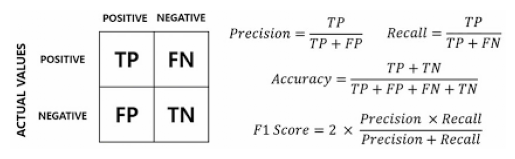

In [995]:
import matplotlib.image as mpimg

image = mpimg.imread("key_metric.png")  

plt.imshow(image)
plt.axis("off") 
plt.show()

## Given the stakes of this project and the imbalance of classes, it's important to consider a set of metrics such as precision, recall and accuracy. Recall being the ratio between what we've detected as being true and what we've detected as being true, it's an interesting metric in our project since the challenge is to maintain our customers.
## So prioritizing the detection of customers who churn is more important than having a good detection of churn every time the model predicts it, but which consequently only identifies a small proportion of these customers. 

## Not to mention that, with a small proportion of classes like this, the difference in cost between retaining customers who would be detected and those who are actually affected is not significant. 

## There could have been other avenues of exploration, such as :

- ### Applying a one-hot encoding to our clustering results, there could have been a major difference from one clsuter to another on the correlation matrix, while avoiding creating a bias between the different clusters since they are automatically ordinally encoded.


## A partir de ces analyses l'entreprise devrait identifier régulièrement le Churn de ses clients pour orienter des campagnes ciblé, leur proposant selon leur data une réduction temporaire.

 Alexandro Bizeul